豆瓣高热电影数据爬取和分析
组员：宁顺磊 1901210052  何雄博 1901210049

首先通过'getting_douban_id.py'和'getting_movie_data.py'爬取豆瓣电影的数据：前者使用豆瓣自身的查询系统，对 "https://movie.douban.com/j/new_search_subjects?sort=T&range=0,10&limit=100&tags=&start={}" 发出请求以获得豆瓣记录的电影的编号，其中'sort=T'表示按照标记最多的顺序，'range=0,10'表示评分在0到10之间，'limit=100'表示一次返回100项，'start'变量表示每次查找的起始位置，据此查询99次，即9900项，得到的数据记录在表'douban.csv'中；后者根据得到的9900个电影的编号，爬取电影详情页 "https://movie.douban.com/subject/{}/" ，'{}'替换为电影在豆瓣的编号，即可整理得到电影标题（name），评分（ge），评价数量（number），年份（year），导演（director），编剧（writer），主演（act），片长（length），类型（type），地区（region）等数据，存于'douban_mv.csv'中，可进行统计分析。

遇到的问题有：
1. 在对电影详情页进行爬取时，会产生两种缺失：未上映的电影没有评价数量，代码运行中体现为爬取评价数量时报错；一些电影详情页的HTML中片长的格式不一致（是无标识符的独立文本）或未给出，代码运行中体现为爬取片长时报错。最终实际得到的电影数量为9801。
2. 用单个id进行爬取时，容易被豆瓣封禁ip，因此采取了随机cookie，headers以及每次爬取之间设置较长间隔的方式

载入数据

In [6]:
import pandas as pd
data = pd.read_csv("./Desktop/douban_mv.csv")

我们首先对高热度电影的年份分布进行了分析，柱状图显示高热度电影分布在80年代之后，而1994年有近300部电影，显著高于邻近年份，这也与电影史相符，由于1995年是电影诞生100周年，因此这一年全世界范围内的好电影喷薄而出，如《肖申克的救赎》，《阿甘正传》，《这个杀手不太冷》和《饮食男女》等经典影片，94年也被称为电影大片之年。

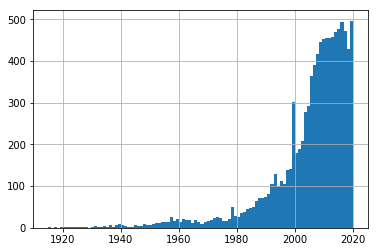

In [171]:
data['year'].hist(bins=100)

评分分布

数据中电影评分呈偏态分布，主要集中在4-9分，比较有意思的是低分高热电影的比例并不低。

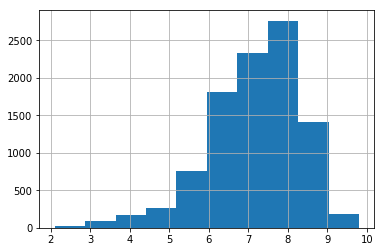

In [172]:
data['ge'].hist()

编剧分布

In [7]:
from collections import Counter
writers = list(data['writer'].values)

l = []
for w in writers:
    l.extend(str(w).split(","))
    
c = Counter(l)
k=list(c.keys())
v=list(c.values())
count=pd.DataFrame({'writer':k,'count':v})
total = count.sort_values(by='count',ascending=False)
total[0:10]

,writer,count
469,王晶,112
5,吕克·贝松,44
1082,伍迪·艾伦,41
943,藤子·F·不二雄,40
570,徐克,39
1461,青山刚昌,33
59,刘镇伟,33
885,游乃海,33
124,谷德昭,32
1109,阮世生,31


主演分布

In [ ]:
出现次数前十的主演全部来自中国香港，反映了香港电影的影响力

In [8]:

actors = list(data['act'].values)

l = []
for w in actors:
    l.extend(str(w).split(","))
    
c = Counter(l)
k=list(c.keys())
v=list(c.values())
count=pd.DataFrame({'actor':k,'count':v})
total = count.sort_values(by='count',ascending=False)
total[1:10]

,actor,count
1184,林雪,124
800,刘德华,118
803,曾志伟,114
802,黄秋生,96
1370,任达华,93
2608,梁家辉,85
3961,古天乐,84
2531,吴君如,82
1257,成龙,81


导演分布

In [9]:
director = list(data['director'].values)
l = []
for w in director:
    l.extend(str(w).split(","))
 
c_d = Counter(l)
k=list(c_d.keys())
v=list(c_d.values())
count_d=pd.DataFrame({'director':k,'count':v})
top = count_d.sort_values(by='count',ascending=False)
top[0:11]

,director,count
188,王晶,73
346,杜琪峰,48
431,伍迪·艾伦,40
225,徐克,35
242,邱礼涛,32
41,刘伟强,31
29,史蒂文·斯皮尔伯格,28
23,刘镇伟,26
133,张艺谋,23
197,陈嘉上,23


制片国家/地区分布

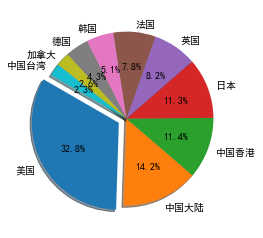

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
region = list(data['region'].values)
l = []
for w in region:
    l.extend(str(w).split(","))
 
c_d = Counter(l)
k=list(c_d.keys())
v=list(c_d.values())
count_d=pd.DataFrame({'region':k,'count':v})
top = count_d.sort_values(by='count',ascending=False)
top_region = top[0:10]
labels = list(top_region['region'].values)
sizes = list(top_region['count'].values)
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(sizes,explode=explode,labels = labels,autopct='%1.1f%%',shadow = True,startangle=150)
plt.show()

类型分布

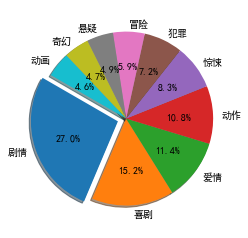

In [14]:
types = list(data['type'].values)
l = []
for w in types:
    l.extend(str(w).split(","))
 
c_d = Counter(l)
k=list(c_d.keys())
v=list(c_d.values())
count_d=pd.DataFrame({'types':k,'count':v})
top = count_d.sort_values(by='count',ascending=False)
top_region = top[0:10]
labels = list(top_region['types'].values)
sizes = list(top_region['count'].values)
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(sizes,explode=explode,labels = labels,autopct='%1.1f%%',shadow = True,startangle=150)
plt.show()

评分和评价人数在各年的分布

我们对各年份电影的评分和评论人数进行了分析，为了对这两个指标进行对比，我们对其按年份进行了标准化。结果显示，标准评论人数随年份总体呈上升趋势，而标准评分则随年份呈下降趋势。

In [ ]:
plt.title('各年份评分分布')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('year')
plt.ylabel('value')
x=data.groupby('year')['number','ge'].mean()
s=(x-x.mean())/x.std()
year = s.index
plt.plot(year, list(s['ge'].values), marker='o', markersize=3)
plt.plot(year, list(s['number'].values), marker='o', markersize=3)
plt.legend(['评分','评论人数'])
plt.show()

评分和评价人数在各地区分布

同样我们选取了出现频次最高的是个制片国家/地区，并对其评分分布进行了分析。标准评分最高的为德国，最低的为中国大陆，而标准评论人数最高的为中国大陆，最低的为加拿大。

由于豆瓣的用户主要集中在中国大陆，因此中国大陆的电影虽然质量层次不齐，但是更容易受到用户关注，因此评论人数和评分两极分化。

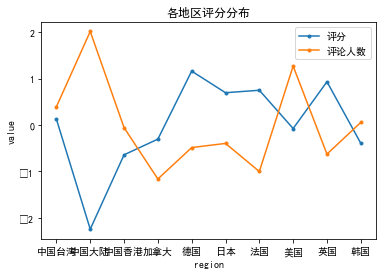

In [23]:
plt.title('各地区评分分布')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('region')
plt.ylabel('value')
top_region = ['美国', '中国大陆', '中国香港', '日本', '英国', '法国', '韩国', '德国', '加拿大', '中国台湾']
dt = data[(data['region']=='美国')|(data['region']=='中国大陆')|(data['region']=='中国香港')|(data['region']=='日本')|(data['region']=='英国')|(data['region']=='法国')|(data['region']=='韩国')|(data['region']=='德国')|(data['region']=='加拿大')|(data['region']=='中国台湾')]
x=dt.groupby('region')['number','ge'].mean()
s=(x-x.mean())/x.std()
year = s.index
plt.plot(year, list(s['ge'].values), marker='o', markersize=3)
plt.plot(year, list(s['number'].values), marker='o', markersize=3)
plt.legend(['评分','评论人数'])
plt.show()